# Example of use of ``fft_electronic_spin_density``

In [1]:
from fft_electronic_spin_density.classes import Density

## Load the density file

In [2]:
density = Density(fname_cube_file='../cube_files/Cu2AC4_rho_sz_256.cube')

da, db, dc [0.06160469 0.         0.        ] [-0.02770984  0.05432322  0.        ] [0.         0.         0.05945465] Angstrom
dka, dkb, dkc [ 0.45329773  0.23122353 -0.        ] [0.         0.53547678 0.        ] [ 0.         -0.          0.73389101] 1/Angstrom
A (Angstrom)
 [[13.86105618  0.          0.        ]
 [-5.98532446 11.7338146   0.        ]
 [ 0.          0.          8.56146919]]

B (1/Angstrom)
 [[101.99198932  52.02529349  -0.        ]
 [  0.         115.6629854    0.        ]
 [  0.          -0.         105.68030608]]


## Visualize the density
- plot density cuts at z=0.0 Angstrom and at the z position of atom 0

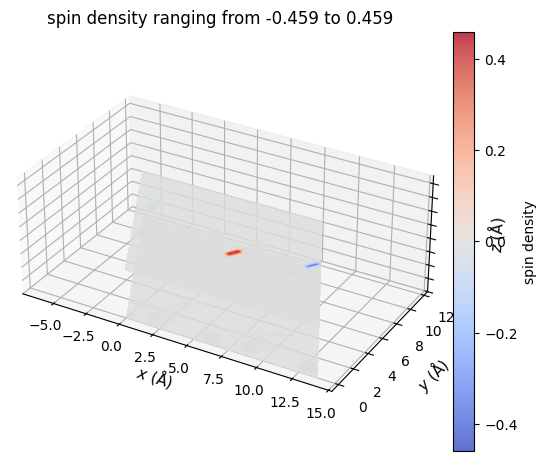

In [ ]:
site_coordinates = density.get_sites_of_atoms(site_idx=[0])
# z position of atom 0
atom_0_z_coordinate = site_coordinates[0][2]

# indices along the c lattice vector where density cuts should be plotted
c_idx = density.get_c_idx_at_z_coordinates(z_coordinates=[0.0, atom_0_z_coordinate])

density.plot_cube_rho_sz(c_idx_arr=c_idx, fout_name=f'plot_2D_example_figure.png', alpha=0.8, 
                         figsize=(10.0, 4.5), dpi=400, zeros_transparent=False,
                         show_plot=True)

In [4]:
rho_sz_tot, rho_sz_abs_tot = density.integrate_cube_file()


Total (spin) charge in the volume: 0.000000 e
Total absolute (spin) charge in the volume: 8.141450 e



In [5]:
density.FFT()
density.plot_fft_2D(i_kz=0)
density.write_cube_file_fft(fout='fft_rho_sz.cube')

- by the way, kz_target must be between 0.00 and 105.680306 1/Angstrom
i_kz(52.473207532295795) 71
take_idx 2
[101.99198932  52.02529349  -0.        ] [  0.        115.6629854   0.       ]
(225, 216, 144)
kz at index 0 is -52.840153 1/Angstrom
